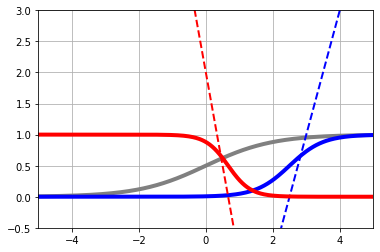

In [15]:
# ロジスティック回帰モデル
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# ロジスティック関数
def logistic(x):
    y = 1 / (1 + npy.exp(-x))
    return y

def logistic1(x,func):
    y = 1 / (1 + npy.exp(-func))
    return y

def func1(x):
    y = 2*x - 5
    return y

def func2(x):
    y = -3*x + 2
    return y
             
X = npy.linspace(-5, 5, 400)
Y = logistic(X)

plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-.5, 3)
plt.plot(X,Y,color='gray',linewidth=4)
plt.plot(X,logistic1(X,func1(X)),color='blue',linewidth=4)
plt.plot(X,func1(X),color='blue',linewidth=2,linestyle='--')
plt.plot(X,logistic1(X,func2(X)),color='red',linewidth=4)
plt.plot(X,func2(X),color='red',linewidth=2,linestyle='--')
    


178.77272727272725

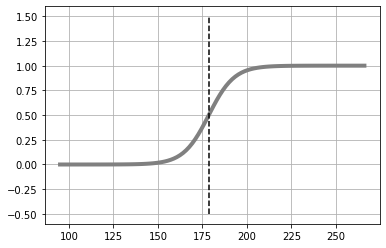

In [19]:
# ロジスティック回帰モデル
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# ロジスティック関数
def logistic(x,w):
    y = 1 / (1 + npy.exp(-(w[0]*x + w[1])))
    return y

# ロジスティック関数の描写
def show_logistic(w):
    xb = npy.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb,y,color='gray',linewidth=4)
    # 決定境界
    i = npy.min(npy.where(y > 0.5))
    B = (xb[i -1] + xb[i])/2
    plt.plot([B, B], [-.5, 1.5],color='k',linestyle='--')
    plt.grid(True)
    return B

# データ生成
# データセットの取り出し
sample_data = npy.load('classdata1.npz')
X_min = sample_data['X_min']
X_max = sample_data['X_max']
X_n = sample_data['X_n']
X = sample_data['X']
X_col = ['cornflowerblue','gray']

#test
W=[0.14,-25]
show_logistic(W)

In [50]:
# 平均交差エントロピー誤差
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# ロジスティック関数
def logistic(x,w):
    y = 1 / (1 + npy.exp(-(w[0]*x + w[1])))
    return y

# 平均交差エントロピー誤差
def cee_logistic(w,x,t):
    y = logistic(x,w)
    cee = 0
    for n in range(len(y)):
        cee = cee -(t[n]*npy.log(y[n]) + (1 - t[n]) * npy.log(1 - y[n]))
    cee = cee / X_n
    return cee

# データ生成
# データセットの取り出し
sample_data = npy.load('classdata1.npz')
X_min = sample_data['X_min']
X_max = sample_data['X_max']
X_n = sample_data['X_n']
X = sample_data['X']
X_col = ['cornflowerblue','gray']

# 目標データ
T = sample_data['Y']

#test
W=[0.1,0]
cee_logistic(W,X,T)

12.979314959797378

C:\Users\wanta\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\wanta\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
C:\Users\wanta\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Z contains NaN values. This may result in rendering artifacts.


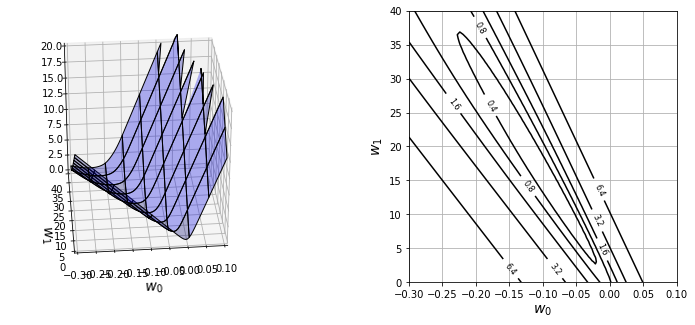

In [60]:
# 平均交差エントロピー誤差
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# ロジスティック関数
def logistic(x,w):
    y = 1 / (1 + npy.exp(-(w[0]*x + w[1])))
    return y

# 平均交差エントロピー誤差
def cee_logistic(w,x,t):
    y = logistic(x,w)
    cee = 0
    for n in range(len(y)):
        cee = cee -(t[n]*npy.log(y[n]) + (1 - t[n]) * npy.log(1 - y[n]))
    cee = cee / X_n
    return cee

# データ生成
# データセットの取り出し
sample_data = npy.load('classdata1.npz')
X_min = sample_data['X_min']
X_max = sample_data['X_max']
X_n = sample_data['X_n']
X = sample_data['X']
X_col = ['cornflowerblue','gray']

# 目標データ
T = sample_data['Y']

wn = 80
w_range = npy.array([[-.3,.1],[-0,40]])
w0 = npy.linspace(w_range[0,0],w_range[0,1],wn)
w1 = npy.linspace(w_range[1,0],w_range[1,1],wn)

ww0, ww1 = npy.meshgrid(w0,w1)
C = npy.zeros((len(w1),len(w0)))
w = npy.zeros(2)

for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0]=cee_logistic(w, X, T)
# グラフ表示
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1, projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue',edgecolor='black',rstride=10,cstride=10,alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(-.3,.1)
ax.set_ylim(0,40)
ax.set_zlim(0,20)
ax.view_init(30,-95)

plt.subplot(1,2,2)
cont = plt.contour(ww0,ww1,C,20,colors='black',levels=[0,0.2,0.4,0.8,1.6,3.2,6.4])
cont.clabel(fmt='%.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()
